In [1]:
import itertools
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from modules.eval import load

real_forces = load('results/mace/dft_forces.pkl')
real_energies = load('results/mace/dft_energies.pkl')
predicted_forces_mace = load('results/mace/predicted_forces.pkl')
predicted_energies_mace = load('results/mace/predicted_energies.pkl')

In [3]:
zro2_ref = np.load('dictionary_zro2.npy',allow_pickle=True)
zro2_ref = zro2_ref.item()

In [4]:
print(len(predicted_energies_mace),len(real_energies))
print(len(predicted_forces_mace),len(real_forces))

14434 14434
14434 14434


In [5]:
geometries_dictionary = {}
for key,value in zro2_ref.items():
    if value[1] not in geometries_dictionary.keys():
        geometries_dictionary[value[1]] = [[key,real_energies[key]]]
    else:
        geometries_dictionary[value[1]].append([key,real_energies[key]])

In [6]:
plt.rcParams["font.family"] = "Georgia"

### Exploratory Search

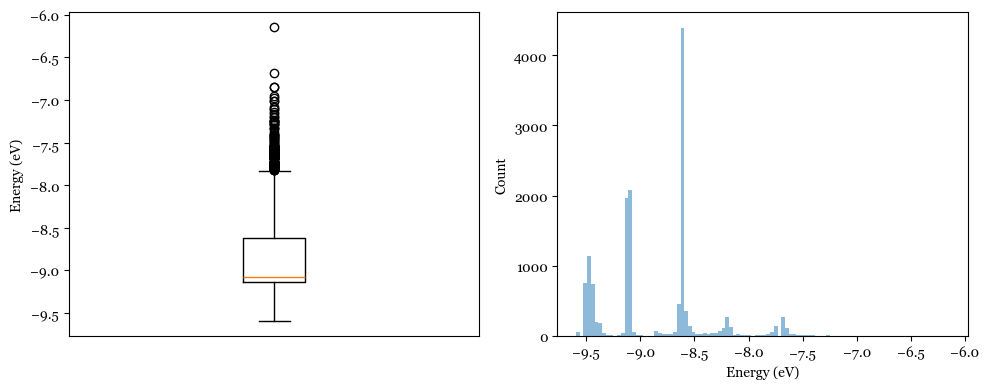

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.boxplot(real_energies)
plt.xticks([]),plt.ylabel('Energy (eV)')

plt.subplot(122)
plt.hist(real_energies,density=False,bins=100,alpha=0.5)
plt.xlabel('Energy (eV)'),plt.ylabel('Count')
# plt.xlim(-2000,0)

plt.tight_layout()
plt.show()

### Geometries Distribution

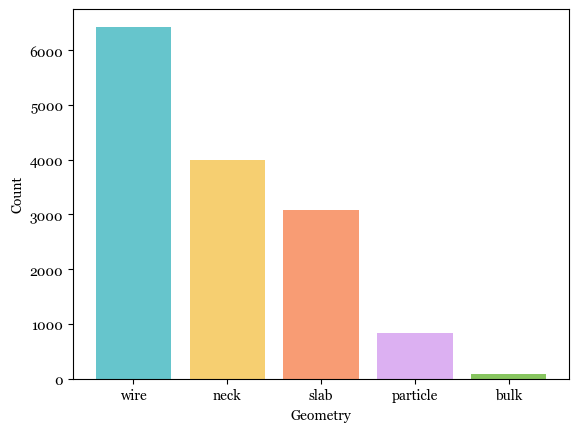

In [8]:
geometries_count = {}

for key,value in geometries_dictionary.items():
    geometries_count[key] = len(value)

geometries_count = {k: v for k, v in sorted(geometries_count.items(), key=lambda item: item[1], reverse=True)}
colors = ['#66c5cc', '#f6cf71', '#f89c74', '#dcb0f2', '#87c55f', '#9eb9f3', '#fe88b1', '#c9db74', '#8be0a4', '#b497e7']
plt.bar(geometries_count.keys(),geometries_count.values(),color=colors)
plt.xlabel('Geometry'),plt.ylabel('Count')
plt.show()

In [9]:
boxplot_data=[]
for key,value in geometries_dictionary.items():
    key_boxplot_data = [i[1] for i in value]
    boxplot_data.append(key_boxplot_data)

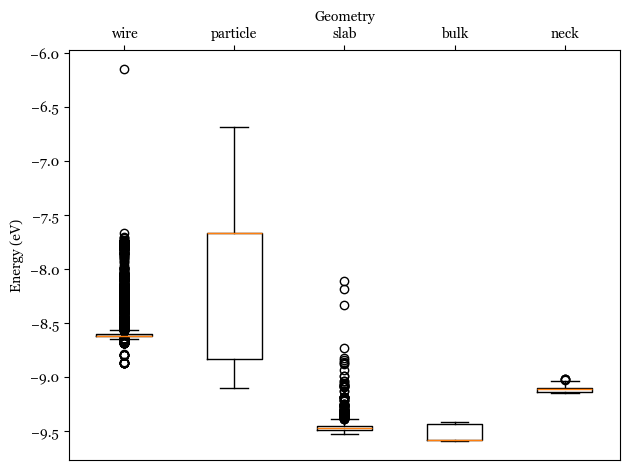

In [10]:
colors = ['#66c5cc', '#f6cf71', '#f89c74', '#dcb0f2', '#87c55f', '#9eb9f3', '#fe88b1', '#c9db74', '#8be0a4', '#b497e7']

fig,ax = plt.subplots()

plt.boxplot([i for i in boxplot_data],tick_labels=list(geometries_dictionary.keys()))
plt.xlabel('Geometry'),plt.ylabel('Energy (eV)')
ax.xaxis.set_ticks_position('top'),ax.xaxis.set_label_position('top')

plt.tight_layout()
plt.show()

# fig,ax = plt.subplots()

# plt.boxplot([i for i in boxplot_data],tick_labels=list(geometries_dictionary.keys()))
# plt.xlabel('Geometry'),plt.ylabel('Energy (eV)')
# ax.xaxis.set_ticks_position('top'),ax.xaxis.set_label_position('top')

# plt.ylim(-1000,0)
# plt.tight_layout()
# plt.show()

In [11]:
boxplot_data_dic = {}

for key, data in zip(geometries_dictionary.keys(),boxplot_data):
    boxplot_data_dic[key] = data

from collections import OrderedDict
ordered_boxplot_data = OrderedDict((key, boxplot_data_dic[key]) for key in list(geometries_count.keys()) if key in boxplot_data_dic)

### Results Evaluation

In [12]:
x_pred,x_real = [],[]
y_pred,y_real = [],[]
z_pred,z_real = [],[]
force_module_pred,force_module_real = [],[]

for force_mace, real_force in zip(predicted_forces_mace,real_forces):

    force_module_pred.append(force_mace[0][1])
    force_module_real.append(real_force[0][1])

    forces_atom_pred = force_mace[0][0]
    forces_atom_real = real_force[0][0]

    x_pred.append(forces_atom_pred[0])
    x_real.append(forces_atom_real[0])
    
    y_pred.append(forces_atom_pred[1])
    y_real.append(forces_atom_real[1])
    
    z_pred.append(forces_atom_pred[2])
    z_real.append(forces_atom_real[2])

In [13]:
def eval_report(y_pred,y_real):
    mae = metrics.mean_absolute_error(y_real,y_pred)
    rmse = metrics.root_mean_squared_error(y_real,y_pred)

    print(f'MAE: {round(mae,4)}')
    print(f'RMSE: {round(rmse,4)}')

In [14]:
print('Energy Mace')
eval_report(predicted_energies_mace,real_energies)
print()
print('Forces Mace')
eval_report(force_module_pred,force_module_real)
print()
print('Forces Mace X')
eval_report(x_pred,x_real)
print()
print('Forces Mace Y')
eval_report(y_pred,y_real)
print()
print('Forces Mace Z')
eval_report(z_pred,z_real)

Energy Mace
MAE: 0.0877
RMSE: 0.091

Forces Mace
MAE: 0.553
RMSE: 0.7076

Forces Mace X
MAE: 0.4318
RMSE: 0.5739

Forces Mace Y
MAE: 0.4628
RMSE: 0.8138

Forces Mace Z
MAE: 0.1303
RMSE: 0.1964


In [15]:
forces_geometries_dictionary = {}
for key,value in zro2_ref.items():
    if value[1] not in forces_geometries_dictionary.keys():
        forces_geometries_dictionary[value[1]] = [[key,force_module_real[key]]]
    else:
        forces_geometries_dictionary[value[1]].append([key,force_module_real[key]])

In [16]:
boxplot_data_forces=[]
for key,value in forces_geometries_dictionary.items():
    key_boxplot_data = [i[1] for i in value]
    boxplot_data_forces.append(key_boxplot_data)

In [17]:
forces_boxplot_data_dic = {}

for key, data in zip(forces_geometries_dictionary.keys(),boxplot_data_forces):
    forces_boxplot_data_dic[key] = data

forces_ordered_boxplot_data = OrderedDict((key, forces_boxplot_data_dic[key]) for key in list(geometries_count.keys()) if key in forces_boxplot_data_dic)

In [18]:
local_envs = {}
for key,value in zro2_ref.items():
    if value[1] not in local_envs: local_envs[value[1]] = [value[2]]
    else: local_envs[value[1]].append(value[2])

total_local_envs = {}
for key,value in local_envs.items():
    # total_local_envs[key] = sum(value)
    total_local_envs[key] = np.mean(value)

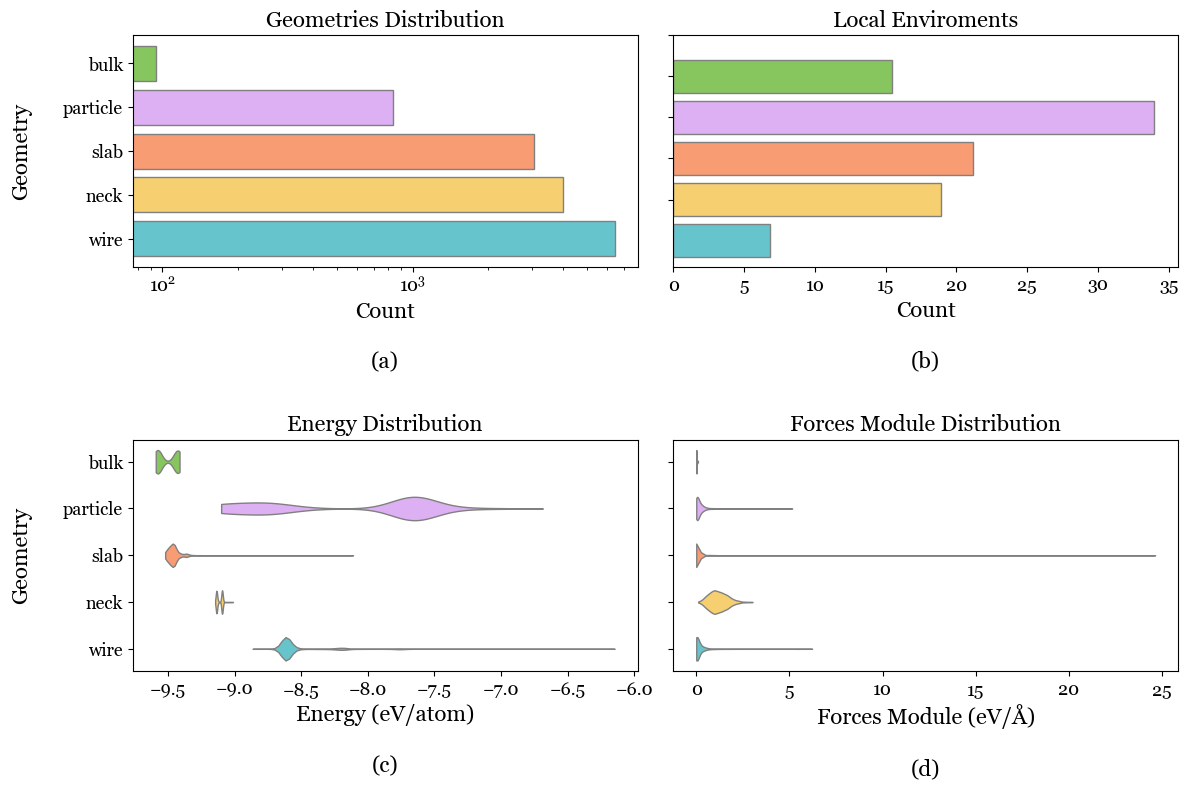

In [19]:
plt.figure(figsize=(12,8))

import matplotlib as mpl
mpl.rcParams["text.usetex"] = False

plt.subplot(221)
plt.title('Geometries Distribution',fontsize=16)
plt.barh(geometries_count.keys(),geometries_count.values(),color=colors,edgecolor='gray')
plt.xlabel('Count\n\n(a)\n',fontsize=16),plt.ylabel('Geometry\n',fontsize=16),plt.xticks(fontsize=13),plt.yticks(fontsize=13)
plt.xscale('log')

plt.subplot(222)
plt.title('Local Enviroments',fontsize=16)
plt.barh(total_local_envs.keys(),total_local_envs.values(),color=colors,edgecolor='gray')
plt.xlabel('Count\n\n(b)\n',fontsize=16),plt.xticks(fontsize=13),plt.yticks(fontsize=13)
plt.yticks([y + 1 for y in range(len(geometries_count))],labels=5*[''],fontsize=13),plt.xticks(fontsize=13)
# plt.xscale('log')

plt.subplot(223)
plt.title('Energy Distribution',fontsize=16)
parts = plt.violinplot([i for i in ordered_boxplot_data.values()],vert=False,showmeans=False,showmedians=False,showextrema=False)
for pc,color in zip(parts['bodies'],colors): pc.set_facecolor(color),pc.set_alpha(1),pc.set_edgecolor('gray')
plt.yticks([y + 1 for y in range(len(geometries_count))],labels=list(geometries_count.keys()),fontsize=13),plt.xticks(fontsize=13)
# plt.yticks([y + 1 for y in range(len(geometries_count))],labels=5*[''],fontsize=13),plt.xticks(fontsize=13)
plt.xlabel('Energy (eV/atom)\n\n(c)',fontsize=16),plt.ylabel('Geometry\n',fontsize=16)
# plt.xlim(-1000,-75)

plt.subplot(224)
plt.title('Forces Module Distribution',fontsize=16)
parts = plt.violinplot([i for i in forces_ordered_boxplot_data.values()],vert=False,showmeans=False,showmedians=False,showextrema=False)
for pc,color in zip(parts['bodies'],colors): pc.set_facecolor(color),pc.set_alpha(1),pc.set_edgecolor('gray')
# plt.yticks([y + 1 for y in range(len(geometries_count))],labels=list(geometries_count.keys()))
plt.yticks([y + 1 for y in range(len(geometries_count))],labels=5*[''],fontsize=13),plt.xticks(fontsize=13)
plt.xlabel('Forces Module (eV/Å)\n\n(d)',fontsize=16)
# plt.xlim(-0.25,7.5)

plt.tight_layout()
plt.savefig('figures/1_dataset.svg',format="svg")
plt.show()

### Scatter Visualization

In [23]:
def parity_plot(X,y,label):
    reg = LinearRegression().fit(X.reshape(-1, 1),y)
    r2 = reg.score(X.reshape(-1, 1),y)
    linreg_x = np.linspace(min(X),max(X),10)
    linreg_y = reg.predict(linreg_x.reshape(-1, 1))

    plt.plot(linreg_x,linreg_y,color='gray',lw=0.75,label=f'Rˆ2={round(r2,5)}')
    plt.scatter(X, y,s=12)

    plt.xlabel(f'Predicted {label}')
    plt.ylabel(f'Real {label}')
    plt.legend()

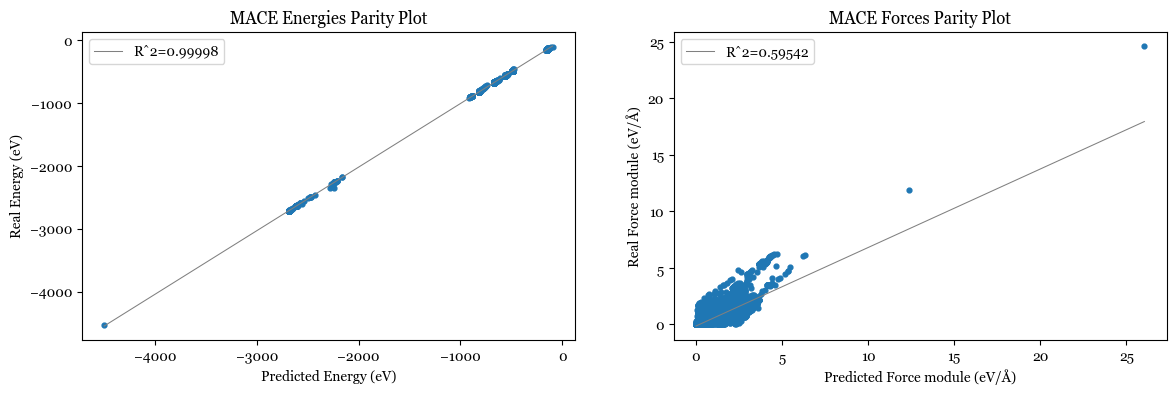

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('MACE Energies Parity Plot')
parity_plot(predicted_energies_mace.reshape(-1, 1),real_energies,label='Energy (eV)')
plt.subplot(122)
plt.title('MACE Forces Parity Plot')
parity_plot(np.array(force_module_pred).reshape(-1, 1),np.array(force_module_real),label='Force module (eV/Å)')

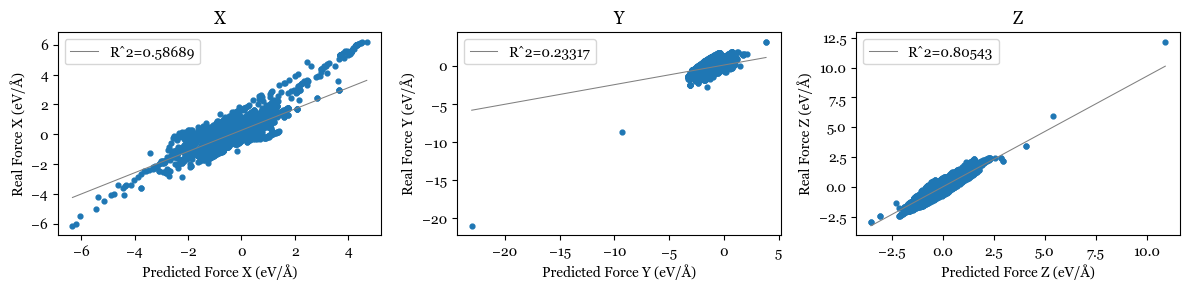

In [25]:
labels,i = ['X','Y','Z'],0

plt.figure(figsize=(12,3))
for pred,real in zip([x_pred,y_pred,z_pred],[x_real,y_real,z_real]):
    plt.subplot(1,3,i+1)
    plt.title(labels[i])
    parity_plot(np.array(pred),np.array(real),label=f'Force {labels[i]} (eV/Å)')
    i+=1

plt.tight_layout()
plt.show()

### Tridimensional Forces Geometry

In [26]:
colors = ['#66c5cc', '#f6cf71', '#f89c74', '#dcb0f2', '#87c55f', '#9eb9f3', '#fe88b1', '#c9db74', '#8be0a4', '#b497e7']

for ikey,key in enumerate(geometries_dictionary.keys()):
    
    geometry_indexes = [i[0] for i in geometries_dictionary[key]]
    ax = plt.figure().add_subplot(projection='3d')
    ax.set_title(f'Geometry {key.title()} Forces')

    for geometry_index in geometry_indexes:
        ax.scatter(x_real[geometry_index],y_real[geometry_index],z_real[geometry_index],color=colors[ikey],alpha=0.5)

    ax.set_xlabel('X'),ax.set_ylabel('Y'),ax.set_zlabel('Z')
    plt.show()

KeyboardInterrupt: 

### Color Coded Visualization

In [27]:
def coded_parity_plot(X,y,label,ref):
    reg = LinearRegression().fit(X.reshape(-1, 1),y)
    r2 = reg.score(X.reshape(-1, 1),y)
    linreg_x = np.linspace(min(X),max(X),10)
    linreg_y = reg.predict(linreg_x.reshape(-1, 1))

    plt.plot(linreg_x,linreg_y,color='gray',lw=0.75) #,label=f'Rˆ2={round(r2,5)}')
    
    colors = ['#66c5cc', '#f6cf71', '#f89c74', '#dcb0f2', '#87c55f', '#9eb9f3', '#fe88b1', '#c9db74', '#8be0a4', '#b497e7']
    symbols = ['o', 's', '^', 'v', '<', '>', 'p', '*', 'D', 'x']
    code = list(itertools.zip_longest(colors, symbols, fillvalue=None))
    
    geometries = [i[1] for i in ref.values()]
    geometries_set = set(geometries)

    geometries_combinations = {}
    for i,geometry in enumerate(geometries_set):
        geometries_combinations[geometry] = code[i]
    
    geometry_test = []
    for i in range(len(X)):
        geometry_set = geometries_combinations[ref[i][1]]

        if ref[i][1] not in geometry_test:
            geometry_test.append(ref[i][1])
            plt.scatter(X[i],y[i],s=25,color=geometry_set[0],marker=geometry_set[1],alpha=0.75,label=ref[i][1])
        else:
            plt.scatter(X[i],y[i],s=25,color=geometry_set[0],marker=geometry_set[1],alpha=0.75)

    plt.xlabel(f'Predicted {label}')
    plt.ylabel(f'Real {label}')
    plt.legend()

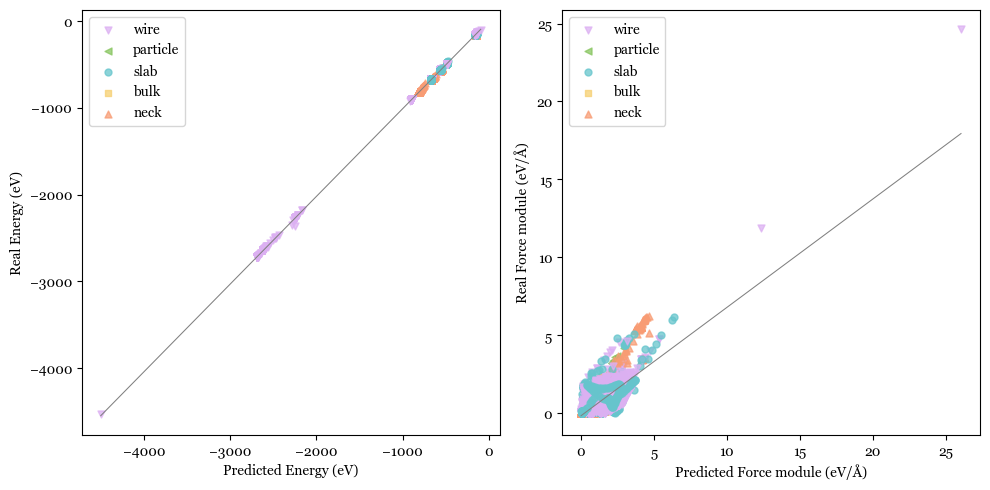

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(121)
coded_parity_plot(predicted_energies_mace.reshape(-1, 1),real_energies,'Energy (eV)',zro2_ref)
plt.subplot(122)
coded_parity_plot(np.array(force_module_pred).reshape(-1, 1),np.array(force_module_real),'Force module (eV/Å)',zro2_ref)

plt.savefig('figures/predicted_geometry.png',transparent=True,dpi=500)
plt.tight_layout()
plt.show()

In [68]:
def coded_scatter_plot(X,y,labelX,labelY,ref):
    colors = ['#66c5cc', '#f6cf71', '#f89c74', '#dcb0f2', '#87c55f', '#9eb9f3', '#fe88b1', '#c9db74', '#8be0a4', '#b497e7']
    symbols = ['o', 's', '^', 'v', '<', '>', 'p', '*', 'D', 'x']
    code = list(itertools.zip_longest(colors, symbols, fillvalue=None))

    geometries = [i[1] for i in ref.values()]
    geometries_set = set(geometries)

    geometries_combinations = {}
    for i,geometry in enumerate(geometries_set):
        geometries_combinations[geometry] = code[i]

    geometry_test = []
    for i in range(len(X)):
        geometry_set = geometries_combinations[ref[i][1]]

        if ref[i][1] not in geometry_test:
            geometry_test.append(ref[i][1])
            plt.scatter(X[i],y[i],s=25,color=geometry_set[0],marker=geometry_set[1],alpha=0.75,label=ref[i][1])
        else:
            plt.scatter(X[i],y[i],s=25,color=geometry_set[0],marker=geometry_set[1],alpha=0.75)

    plt.xlabel(f'Predicted {labelX}')
    plt.ylabel(f'Real {labelY}')
    plt.legend()

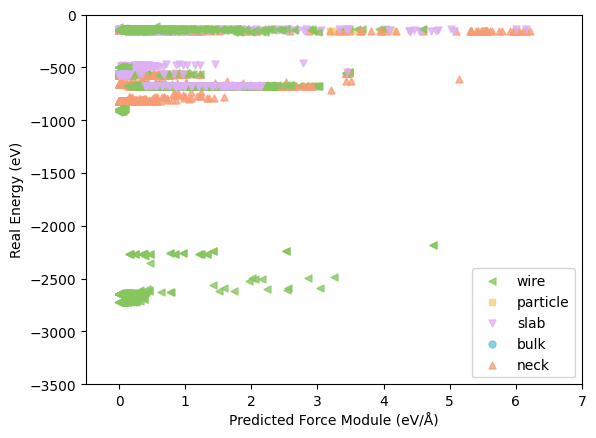

In [69]:
coded_scatter_plot(force_module_real,real_energies,'Force Module (eV/Å)','Energy (eV)',zro2_ref)
plt.xlim(-0.5,7)
plt.ylim(-3500,0)
plt.show()